In [1]:
import scanpy as sc
import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
plt.rcParams['figure.figsize']=8,8

In [2]:
paths = ['/storage/groups/ml01/workspace/group.daniela/MCA_normalised/',
         '/storage/groups/ml01/workspace/group.daniela/tm/droplet/norm/',
         '/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/']

In [3]:
paths_mca = '/storage/groups/ml01/workspace/group.daniela/MCA_normalised/'

In [4]:
paths_tm_d = '/storage/groups/ml01/workspace/group.daniela/tm/droplet/norm/'
paths_tm_f = '/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/'

In [5]:
adatas_mca = []
for i in glob.glob(paths_mca+'*.h5ad'):
    adatas_mca.append(sc.read(i))

In [26]:
adatas_tm_d = []
for j in glob.glob(paths_tm_d+'*.h5ad'):
        adatas_tm_d.append(sc.read(j))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [6]:
adatas_tm_f = []
for j in glob.glob(paths_tm_f+'*.h5ad'):
        adatas_tm_f.append(sc.read(j))

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [150]:
adata_tm.obs.cell_type.value_counts()['nan']

1197

In [9]:
adata_mca = adatas_mca[0].concatenate(adatas_mca[1:], batch_key='sample_id')

In [27]:
adata_tm_d = adatas_tm_d[0].concatenate(adatas_tm_d[1:], batch_key='sample_id')
adata_tm_f = adatas_tm_f[0].concatenate(adatas_tm_f[1:], batch_key='sample_id')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


In [28]:
adata_tm_d.obs['study']='TM-droplet'

In [29]:
adata_tm_f.obs['study']='TM-smartseq2'

In [30]:
adata_tm = adata_tm_f.concatenate(adata_tm_d)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Or pass `index_unique!=None` to `.concatenate`.


In [15]:
adata_tm.obs_names_make_unique()

In [16]:
adata_mca.obs['study']='MCA'

In [33]:
types_tm=adata_tm.obs.cell_type.unique()
types_mca=adata_mca.obs.cell_type.unique()

In [34]:
types_tm_wo = []
for i in types_tm:
    types_tm_wo.append(i.replace(' cell',''))
types_mca_wo = []
for i in types_mca:
    types_mca_wo.append(i.replace(' cell',''))

In [35]:
adata_tm.obs.replace('Limb_Muscle', 'Muscle', inplace=True)
adata_tm.obs.replace('Mammary_Gland', 'Mammary', inplace=True)

In [36]:
import scIB

In [37]:
scIB.preprocessing.reduce_data(adata_mca)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/scanpy/preprocessing/_highly_variable_genes.py:135: RuntimeWarning: invalid value encountered in true_divide
  ) / disp_mad_bin[df['mean_bin'].values].values



Number of highly variable genes: 3999


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py (457)

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] During: resolving callee

In [38]:
scIB.preprocessingprocessing.reduce_data(adata_tm)


Number of highly variable genes: 4000


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [39]:
from fuzzywuzzy import fuzz, process

In [103]:
import pandas as pd
ratio = pd.DataFrame(columns=types_mca_wo)

In [40]:
adata_mca.obs.cell_type.replace('B cell', 'B Cell', inplace=True)
adata_mca.obs.cell_type.replace('Dendrtic cell', 'Dendritic cell', inplace=True)
adata_mca.obs.cell_type.replace('Epithelia cell', 'Epithelial cell', inplace=True)
adata_mca.obs.cell_type.replace('Muscle  cell', 'Muscle cell', inplace=True)
adata_mca.obs.cell_type.replace('Muscel cell', 'Muscle cell', inplace=True)
adata_mca.obs.cell_type.replace('NK', 'Natural killer cell', inplace=True)
adata_mca.obs.cell_type.replace('NK Cell', 'Natural killer cell', inplace=True)
adata_mca.obs.cell_type.replace('NK cell', 'Natural killer cell', inplace=True)
adata_mca.obs.cell_type.replace('Natural kill cell', 'Natural killer cell', inplace=True)
adata_mca.obs.cell_type.replace('T Cell', 'T cell', inplace=True)
adata_mca.obs.cell_type.replace('T-cell', 'T cell', inplace=True)

In [41]:
adata_mca.obs['cell_type'] = adata_mca.obs.cell_type.str.replace('cells', 'cell')

In [43]:
len(types_tm)

76

In [141]:
for i in types_mca_wo:
    #for j in types_mca_wo:
    #    ratio.loc[i,j]=fuzz.ratio(i,j)
    print(i+'\t'+str(process.extract(i, types_tm_wo, limit=10)))

Pre T	[('T', 90), ('Fraction A pre-pro B', 86), ('immature T', 86), ('DN1 thymic pro-T', 86), ('immature NK T', 86), ('regulatory T', 86), ('pre-natural killer', 86), ('pro-B', 60), ('skeletal muscle satellite', 54), ('hematopoietic precursor', 54)]
B Cell	[('B', 90), ('Fraction A pre-pro B', 86), ('late pro-B', 86), ('early pro-B', 86), ('immature B', 86), ('type B pancreatic', 86), ('kidney collecting duct epithelial', 60), ('pancreatic stellate', 60), ('endothelial', 45), ('skeletal muscle satellite', 45)]
abT	[('T', 90), ('B', 90), ('hepatocyte', 60), ('natural killer', 60), ('Fraction A pre-pro B', 60), ('hematopoietic precursor', 60), ('late pro-B', 60), ('proerythroblast', 60), ('erythroblast', 60), ('immature B', 60)]
DPT	[('T', 90), ('endothelial', 60), ('hepatocyte', 60), ('duct epithelial', 60), ('epithelial of lung', 60), ('lung endothelial', 60), ('pancreatic D', 57), ('myeloid', 45), ('endothelial of hepatic sinusoid', 40), ('kidney capillary endothelial', 40)]
Proliferat

In [44]:
import seaborn as sns

In [16]:
  adata.var['gene_id'] = adata.var['gene_id-1']
    adata.var.drop(columns = ['gene_id-1', 'gene_id-0'], inplace=True)
    adata.obs.drop(columns=['sample_id'], inplace=True)
    adata.obs_names = [c.split("-")[0] for c in adata.obs_names]
    adata.obs_names_make_unique(join='_')

,batch,tissue,sample,sex,cell_type,n_counts,log_counts,n_genes,percent_mito,size_factors
index,,,,,,,,,,
O5.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,732851.0,13.504698,2453,0.0,0.708232
C3.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,777302.0,13.563584,2061,0.0,0.944989
F17.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,553412.0,13.223858,1861,0.0,0.557492
I17.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,717135.0,13.483020,2219,0.0,0.792494
K17.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,479080.0,13.079623,1628,0.0,0.468676
M12.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,940942.0,13.754637,2816,0.0,0.912111
P16.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,345921.0,12.753965,1568,0.0,0.265924
C4.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,523867.0,13.168993,2060,0.0,0.535897
F21.MAA000570.3_8_M.1.1,0,Brain,3_8_M,M,microglial cell,608357.0,13.318517,2036,0.0,0.747600


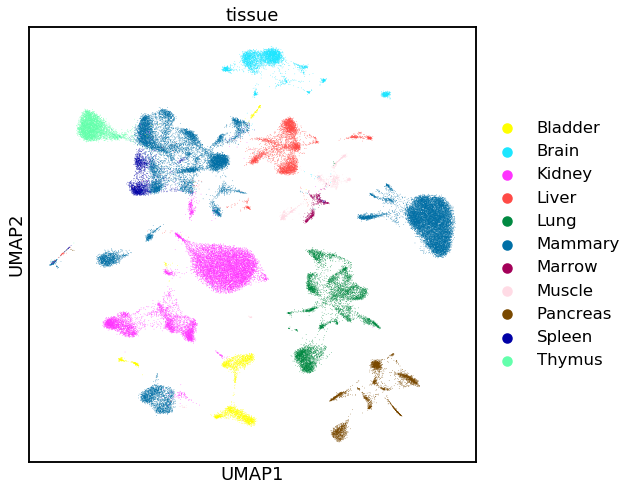

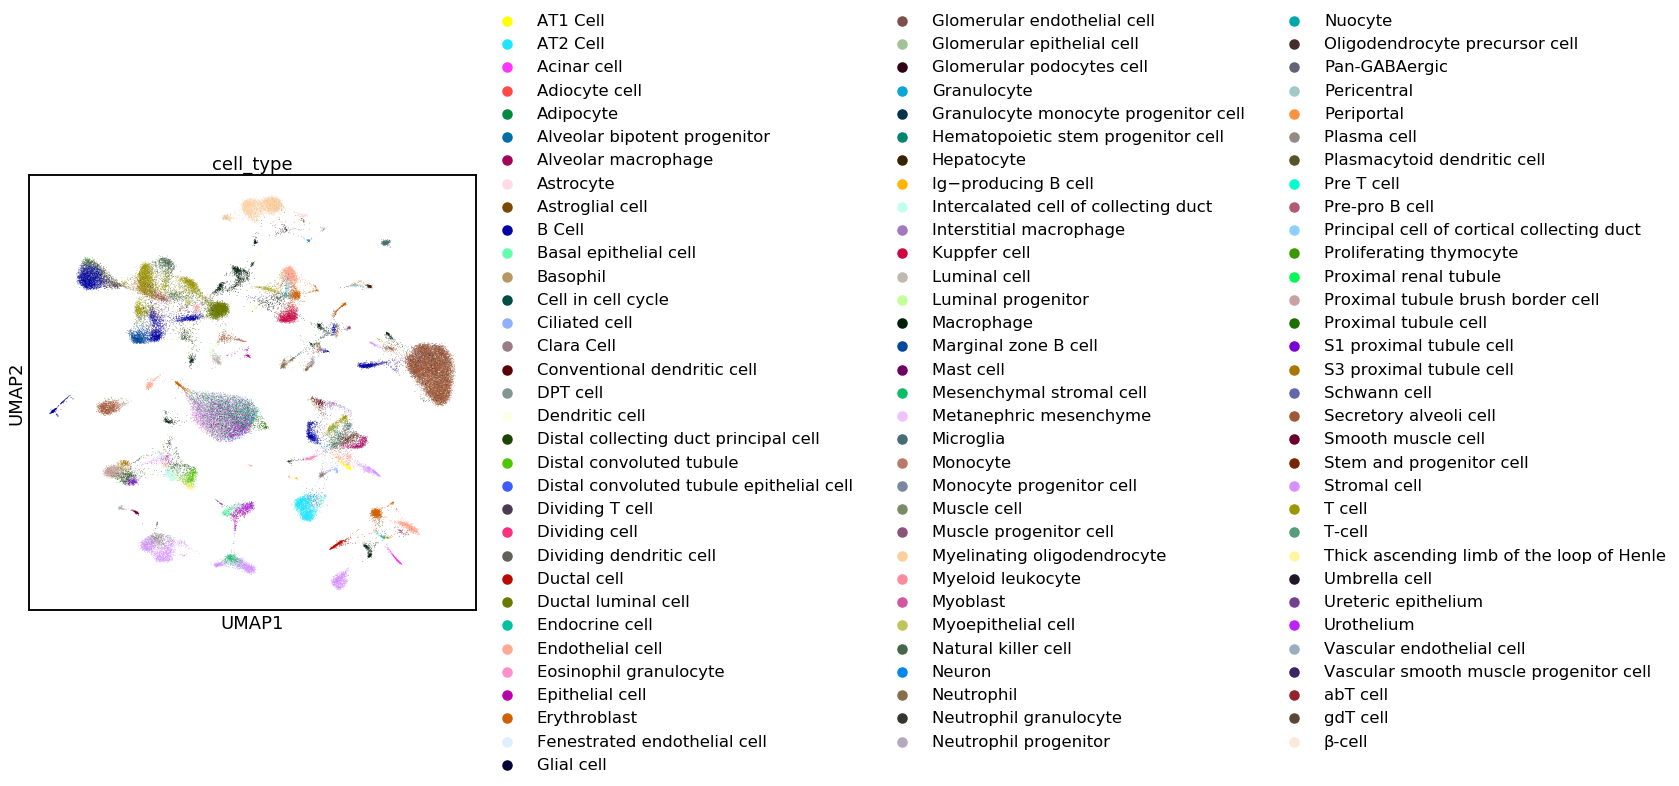

In [60]:
sc.pl.umap(adata_mca, color='tissue', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata_mca, color='cell_type', palette=sc.pl.palettes.godsnot_64)

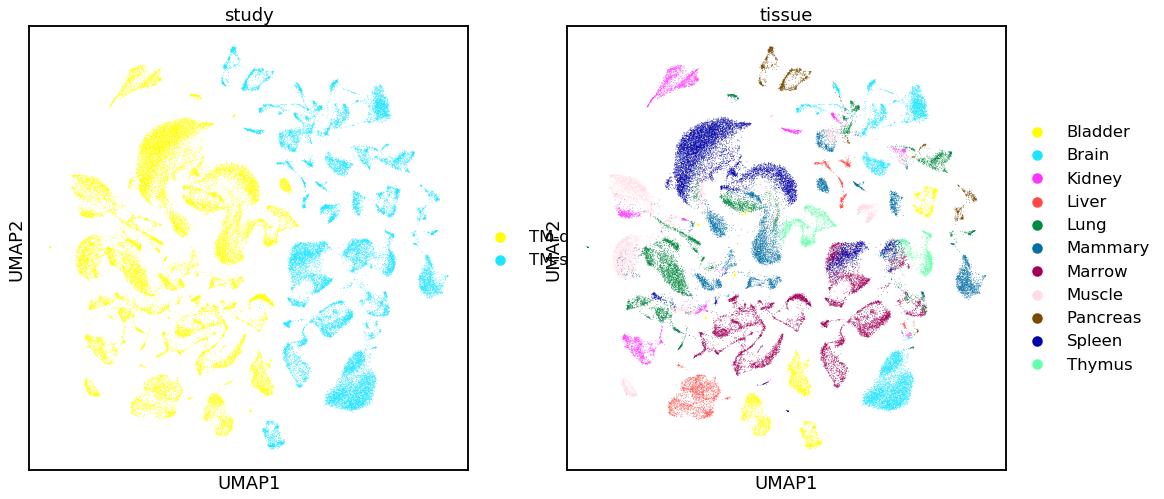

In [57]:
sc.pl.umap(adata_tm, color=['study', 'tissue'],  palette=sc.pl.palettes.godsnot_64)

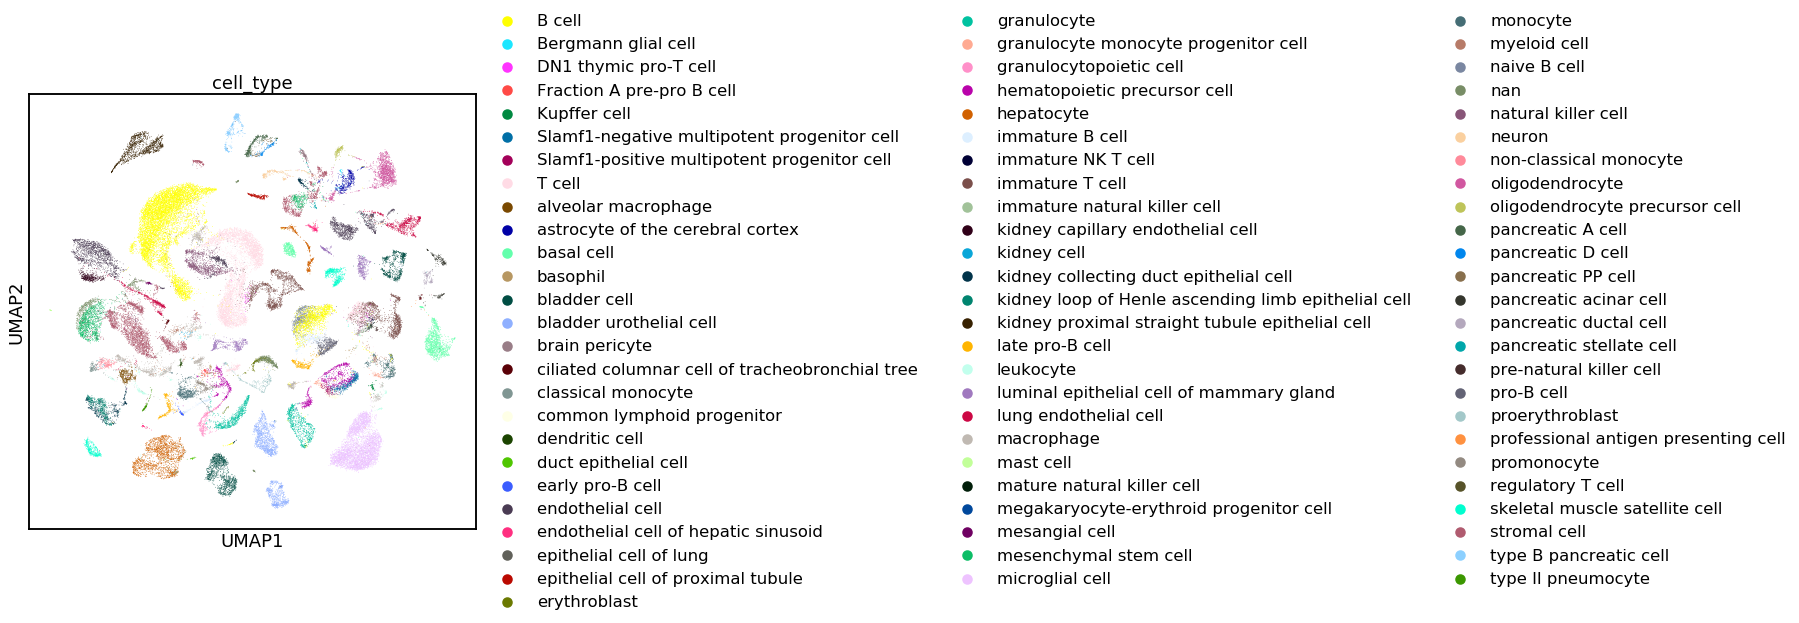

In [58]:
sc.pl.umap(adata_tm, color='cell_type',  palette=sc.pl.palettes.godsnot_64)

In [178]:
sc.tl.rank_genes_groups(adata_tm, groupby='cell_type', key_added='rank_genes')

... storing 'cell_type' as categorical
... storing 'channel' as categorical
... storing 'sample' as categorical
... storing 'sample_id' as categorical
... storing 'sex' as categorical
... storing 'study' as categorical
... storing 'tissue' as categorical


In [179]:
sc.tl.rank_genes_groups(adata_mca, groupby='cell_type', key_added='rank_genes')

... storing 'cell_type' as categorical
... storing 'study' as categorical


In [185]:
adata_mca.obs.cell_type.unique()

[Pre T cell, B Cell, abT cell, DPT cell, Proliferating thymocyte, ..., Astroglial cell, Pan-GABAergic, Oligodendrocyte precursor cell, Neuron, Microglia]
Length: 96
Categories (96, object): [Pre T cell, B Cell, abT cell, DPT cell, ..., Pan-GABAergic, Oligodendrocyte precursor cell, Neuron, Microglia]

In [131]:
for i in adata_mca.obs.tissue.unique():
    print(i+'\n')
    t_mca = adata_mca[adata_mca.obs.tissue==i].obs.cell_type.unique()
    t_tm = adata_tm[adata_tm.obs.tissue==i].obs.cell_type.unique()
    for j in t_mca:
        print(j+'\t'+str(process.extract(j, t_tm, limit=4)))
    print('\n')

Thymus

Pre T cell	[('immature T cell', 86), ('DN1 thymic pro-T cell', 86), ('professional antigen presenting cell', 86), ('nan', 0)]
B Cell	[('immature T cell', 86), ('DN1 thymic pro-T cell', 86), ('professional antigen presenting cell', 86), ('nan', 0)]
abT cell	[('immature T cell', 86), ('DN1 thymic pro-T cell', 86), ('professional antigen presenting cell', 86), ('nan', 18)]
DPT cell	[('immature T cell', 86), ('DN1 thymic pro-T cell', 86), ('professional antigen presenting cell', 86), ('nan', 0)]
Proliferating thymocyte	[('professional antigen presenting cell', 47), ('DN1 thymic pro-T cell', 43), ('immature T cell', 37), ('nan', 30)]
T cell	[('immature T cell', 90), ('DN1 thymic pro-T cell', 90), ('professional antigen presenting cell', 86), ('nan', 0)]
gdT cell 	[('immature T cell', 86), ('DN1 thymic pro-T cell', 86), ('professional antigen presenting cell', 86), ('nan', 0)]


Spleen

Plasma cell	[('T cell', 86), ('B cell', 86), ('natural killer cell', 86), ('dendritic cell', 50)]


In [194]:
split = scIB.utils.splitBatches(liver_norm, 'study')

In [195]:
for i in split:
    sc.tl.rank_genes_groups(i, groupby='cell_type', key_added='rank_genes')
    markers=pd.DataFrame.from_records(split[0].uns['rank_genes']['names'])

Trying to set attribute `.obs` of view, making a copy.
... storing 'barcode' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'marker_gene' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'sample' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'sex' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'study' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'barcode' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'cell_type' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'channel' as categorical
Trying to set attribute `.obs` of view, making a copy.
... storing 'marker_gene

In [143]:
import pandas as pd

In [168]:
test=pd.DataFrame(columns=mark1.columns)
test.loc['a','Basophil']=1

In [199]:
mark1 = pd.DataFrame.from_records(split[0].uns['rank_genes']['names'])
mark2 = pd.DataFrame.from_records(split[1].uns['rank_genes']['names'])
out = pd.DataFrame(columns=mark1.columns)
for i in mark1:
    a = set(mark1[i])
    for j in mark2:
        b = set(mark2[j])
        out.loc[j,i]=len(a.intersection(b))

In [200]:
out.T

,B cell,Kupffer cell,endothelial cell of hepatic sinusoid,hepatocyte,natural killer cell
B Cell,27,2,0,1,5
Dendritic cell,25,19,0,0,13
Endothelial cell,1,0,49,0,1
Epithelial cell,3,1,1,12,1
Erythroblast,10,25,4,4,7
Granulocyte,5,8,0,0,6
Hepatocyte,0,0,0,54,0
Kuppfer cell,6,45,0,1,2
Macrophage,16,31,0,0,11
Neutrophil,6,6,0,0,7


In [198]:
out.idxmax(axis=1)

duct epithelial cell                      Dendritic cell
endothelial cell of hepatic sinusoid    Endothelial cell
hepatocyte                                   Pericentral
leukocyte                                   Kuppfer cell
nan                                           Periportal
dtype: object

In [74]:
for i in adata_mca.obs.tissue.unique():
    t_mca = adata_mca[adata_mca.obs.tissue==i].obs.cell_type.unique()
    t_tm = adata_tm[adata_tm.obs.tissue==i].obs.cell_type.unique()
    print(adata_mca[adata_mca.obs.tissue==i].obs.cell_type.value_counts())
    print()
    print(adata_tm[adata_tm.obs.tissue==i].obs.cell_type.value_counts())
    print("--------------------------------------------------")

Thymus
B Cell                     2261
DPT cell                   1012
Proliferating thymocyte     403
T cell                      281
abT cell                    237
gdT cell                     77
Pre T cell                   18
Name: cell_type, dtype: int64

immature T cell                         2631
DN1 thymic pro-T cell                     76
professional antigen presenting cell      71
nan                                        2
Name: cell_type, dtype: int64
--------------------------------------------------
Spleen
Marginal zone B cell    1026
T cell                   622
Dendritic cell            85
Natural killer cell       80
Monocyte                  57
Granulocyte               35
Macrophage                26
Plasma cell               21
Name: cell_type, dtype: int64

B cell                 8183
T cell                 2282
macrophage              512
natural killer cell     230
dendritic cell           42
nan                      21
Name: cell_type, dtype: int64
---------

In [70]:
adata_mca[adata_mca.obs.tissue==''].obs.cell_type.value_counts()

Neutrophil                            142
Neutrophil progenitor                 101
Pre-pro B cell                         68
B Cell                                 47
Macrophage                             45
Monocyte                               31
T cell                                 30
Hematopoietic stem progenitor cell     16
Dendritic cell                         15
Erythroblast                           11
Mast cell                               4
Name: cell_type, dtype: int64

In [69]:
adata_tm[adata_tm.obs.tissue=='Marrow'].obs.cell_type.value_counts()

granulocyte                                    1486
hematopoietic precursor cell                   1161
monocyte                                        789
naive B cell                                    692
late pro-B cell                                 571
pro-B cell                                      517
nan                                             460
immature B cell                                 457
Slamf1-negative multipotent progenitor cell     430
macrophage                                      396
granulocytopoietic cell                         378
proerythroblast                                 265
promonocyte                                     257
T cell                                          162
common lymphoid progenitor                      156
erythroblast                                    155
granulocyte monocyte progenitor cell            136
Slamf1-positive multipotent progenitor cell     134
basophil                                         86
Fraction A p

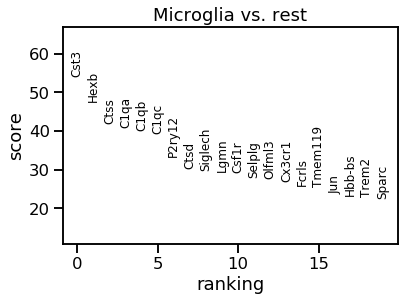

In [191]:
sc.pl.rank_genes_groups(adata_mca, key='rank_genes', groups=['Microglia'], fontsize=12)

In [193]:
scIB.preprocessing.reduce_data(adata_tm)


Number of highly variable genes: 3999


/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [20]:
lung = sc.read('/home/icb/daniel.strobl/group.daniela/tm/droplet/raw/Lung_raw.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


In [23]:
lung = lung[lung.obs.cell_type!='nan']
lung.obs_names_make_unique()

In [25]:
sc.write('/home/icb/daniel.strobl/lung.h5ad', lung)

In [76]:
adata = adata_mca.concatenate(adata_tm)

In [81]:
lung_norm = adata[adata.obs.tissue=='Lung']

In [108]:
liver_norm = adata[adata.obs.tissue=='Liver']

In [115]:
bladder_norm = adata[adata.obs.tissue=='Bladder']

In [121]:
spleen_norm = adata[adata.obs.tissue=='Spleen']

In [124]:
scanorama = scIB.integration.runScanorama(spleen_norm, 'study')

Found 18756 genes among all datasets
[[0.         0.10502049 0.27356557]
 [0.         0.         0.29581615]
 [0.         0.         0.        ]]
Processing datasets (1, 2)
Processing datasets (0, 2)
Processing datasets (0, 1)


In [101]:
bbknn = scIB.integration.runBBKNN(lung_norm, 'study')

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:742: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/icb/daniel.strobl/mini

In [125]:
scanorama[1].obsm['X_pca']=scanorama[0]

In [126]:
sc.pp.neighbors(scanorama[1])
sc.tl.umap(scanorama[1])

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


In [103]:
sc.tl.umap(bbknn)

/home/icb/daniel.strobl/miniconda3/envs/sc-tutorial/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


... storing 'barcode' as categorical
... storing 'cell_type' as categorical
... storing 'channel' as categorical
... storing 'marker_gene' as categorical
... storing 'sample' as categorical
... storing 'sample_id' as categorical
... storing 'sex' as categorical
... storing 'study' as categorical
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its 

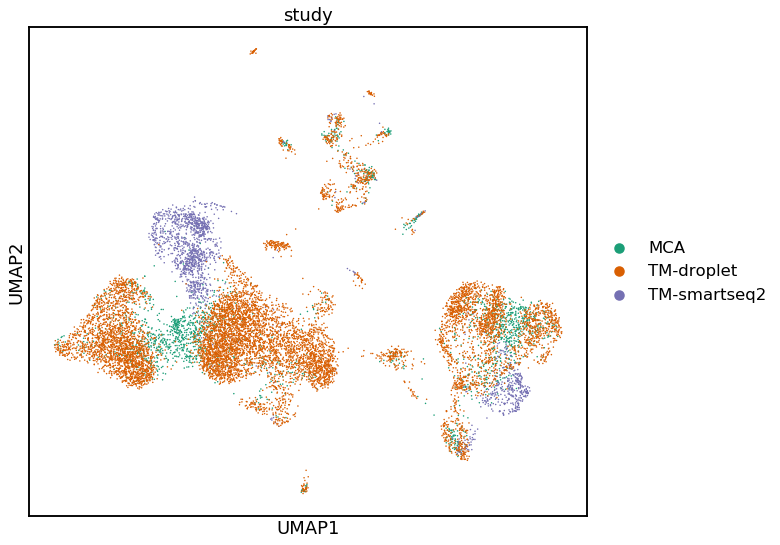

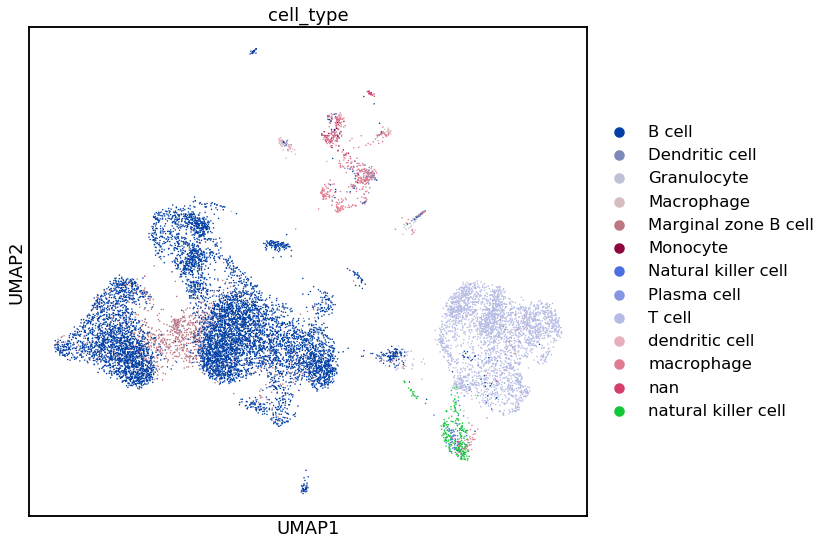

In [127]:
sc.pl.umap(scanorama[1], color=['study'])
sc.pl.umap(scanorama[1], color='cell_type')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


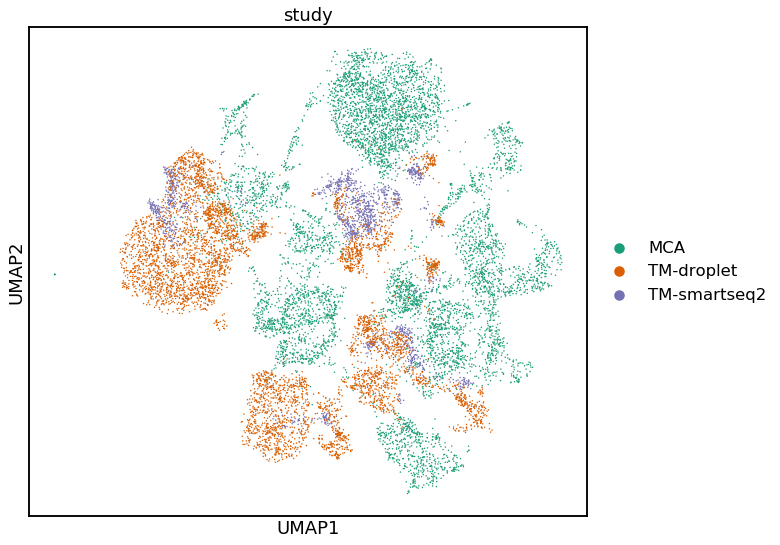

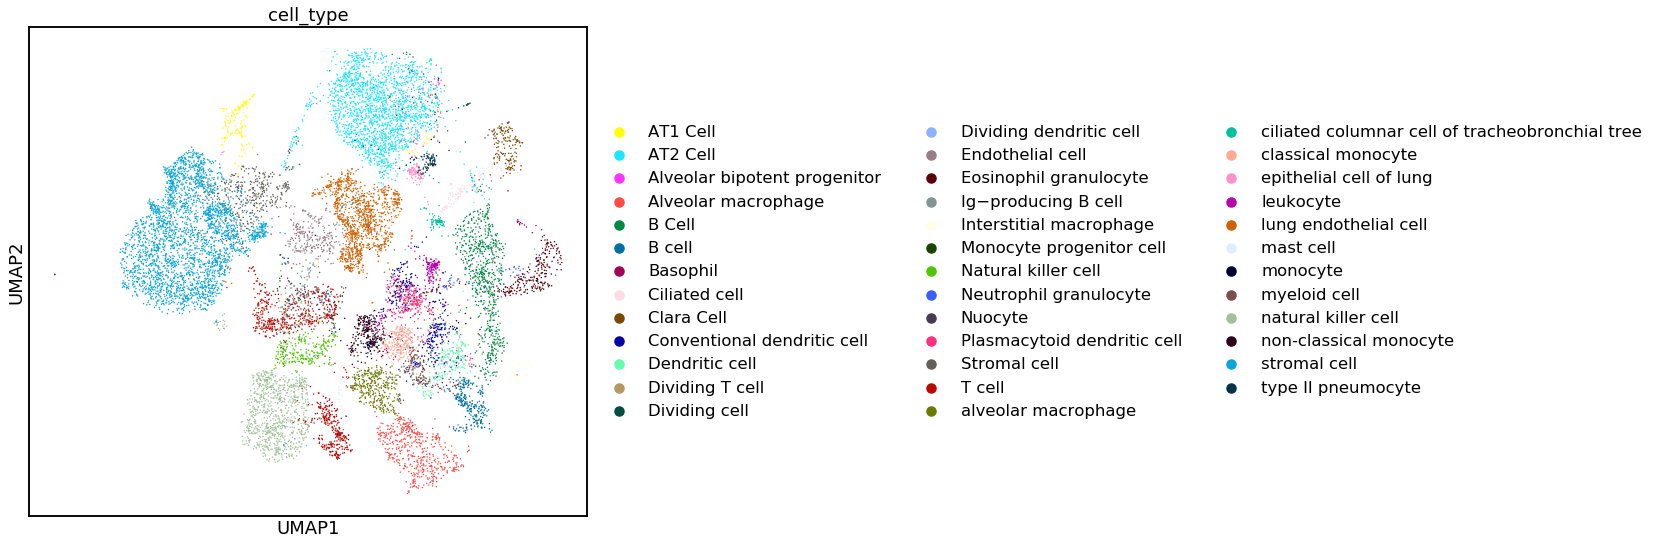

In [105]:
sc.pl.umap(bbknn, color=['study'])
sc.pl.umap(bbknn, color='cell_type')